In [116]:
import pandas as pd
import numpy as np
import math
import scipy as sp

from scipy.stats import norm
from scipy.stats import truncnorm
from scipy.special import gamma
from sklearn.preprocessing import normalize

In [ ]:
## Binary Probit estimation with Bayesian Approach

In [ ]:
# (NOT) hiearchical approach based on James and Chib (1993)

In [30]:
# from sklearn import datasets, linear_model
# diabetes = datasets.load_diabetes()

# # Use only one feature
# diabetes_X = diabetes.data[:, np.newaxis, 2]

# # Split the data into training/testing sets
# X = diabetes.data # diabetes_X[:-20]

# # Split the targets into training/testing sets
# y = diabetes.target
# y = y - np.mean(y)
# y = y > 100

In [135]:
def convert_onehot_train(df,cols):
    di = {}
    for col in cols:
        di[col] = df[col].unique()


    for col in cols:
        df[di[col]] = pd.get_dummies(df[col])

    return df,reduce(lambda a,b:a+b,map(lambda k:di[k].tolist(),di))

def accuracy(beta,x,y):
    prediction = norm.cdf(np.matmul(x,beta)) > 0.5
    prediction = prediction.astype(int)
    return np.sum(prediction == y)*100./y.size


In [136]:
def drawZ(beta,X,y):
    # draw Z values based on equation (6)
    Z = np.zeros(y.shape)
    for i in range(0,y.shape[0]):
        if y[i]==1:
            mean = np.matmul(X[i,].T, beta)
            Z[i] = truncnorm.rvs(0,np.inf,loc=mean,scale=1)
        else:
            mean = np.matmul(X[i,].T, beta)
            Z[i] = truncnorm.rvs(-np.inf,0,loc=mean,scale=1)
    return Z
        

# What if the distribution mean is far from 0 and we cannot
# get a point in the non trucated area?

In [119]:
def drawBeta(B0,X,Z):
    XXinv = np.linalg.inv(np.matmul(X.T,X))
    Xy = np.matmul(X.T,y)
    beta0 = np.matmul(XXinv,Xy)
    
    Bn = np.linalg.inv(np.linalg.inv(B0)+np.matmul(X.T,X))
    beta_tilda = np.matmul(Bn,(np.matmul(np.linalg.inv(B0),beta0)+np.matmul(X.T,Z)))
    
    return sp.stats.multivariate_normal.rvs(beta_tilda, Bn, 1)

In [158]:
# hyper parameters

def simulateProbit(X,y,B0,n):
    beta_s = []
    B0 = np.identity(X.shape[1])
    XXinv = np.linalg.inv(np.matmul(X.T,X))
    Xy = np.matmul(X.T,y)
    beta = np.matmul(XXinv,Xy)
    for i in range(0,n):
        #print "accuracy",accuracy(beta,X,y)
        Z = drawZ(beta,X,y)
        beta = drawBeta(B0,X,Z)
        beta_s.append(beta)
        #print beta
        
    return beta, beta_s
        
        
    

In [ ]:
# use cleaned version of Titanic survival data

# data = pd.read_csv('train_jj.csv')
# y = data['Survived']
# X = data[['Pclass','Sex', 'SibSp', 'Parch', 'Fare']]

df = pd.read_csv('train_jj.csv')
df,new_cols = convert_onehot_train(df,['Pclass','Sex'])
y = df['Survived']
columns = df.columns.tolist()
columns = filter(lambda l:l not in ['Pclass','Sex','Survived','male',1],columns)
x = df[columns]
x['bias'] = 1.

x = x.as_matrix()
#print np.max(x,axis=0)
#x = x / np.max(x,axis=0)
y = y.as_matrix()

beta, beta0 = simulateProbit(x,y,B0, 10000)


/Users/sigho/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:

columns

In [197]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,3,1,2,male,female
0,0,3,male,1,0,7.2500,0,0,1,0,1
1,1,1,female,1,0,71.2833,1,0,0,1,0
2,1,3,female,0,0,7.9250,0,0,1,1,0
3,1,1,female,1,0,53.1000,1,0,0,1,0
4,0,3,male,0,0,8.0500,0,0,1,0,1
5,0,3,male,0,0,8.4583,0,0,1,0,1
6,0,1,male,0,0,51.8625,1,0,0,0,1
7,0,3,male,3,1,21.0750,0,0,1,0,1
8,1,3,female,0,2,11.1333,0,0,1,1,0
9,1,2,female,1,0,30.0708,0,1,0,1,0


In [194]:
df[2]

0      1
1      0
2      1
3      0
4      1
5      1
6      0
7      1
8      1
9      0
10     1
11     0
12     1
13     1
14     1
15     0
16     1
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     1
27     0
28     1
29     1
      ..
861    0
862    0
863    1
864    0
865    0
866    0
867    0
868    1
869    1
870    1
871    0
872    0
873    1
874    0
875    1
876    1
877    1
878    1
879    0
880    0
881    1
882    1
883    0
884    1
885    1
886    0
887    0
888    1
889    0
890    1
Name: 2, Length: 891, dtype: uint8

<IPython.core.display.Javascript object>


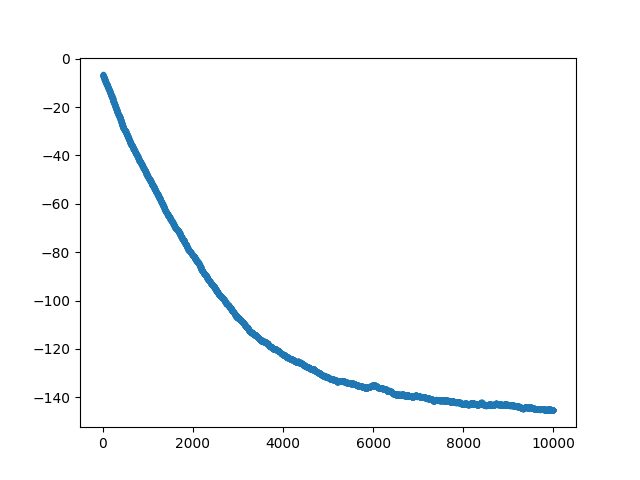

In [181]:
import matplotlib.pyplot as plt
%matplotlib notebook
x0 = range(0,len(beta0))
plt.plot(x0, map(lambda l:l[0],beta0), '.')
#plt.plot(x0, map(lambda l:l[1],beta0), '.')
#plt.plot(x0, map(lambda l:l[2],beta0), '.')
#plt.plot(x0, map(lambda l:l[3],beta0), '.')
#plt.plot(x0, map(lambda l:l[4],beta0), '.')

<IPython.core.display.Javascript object>


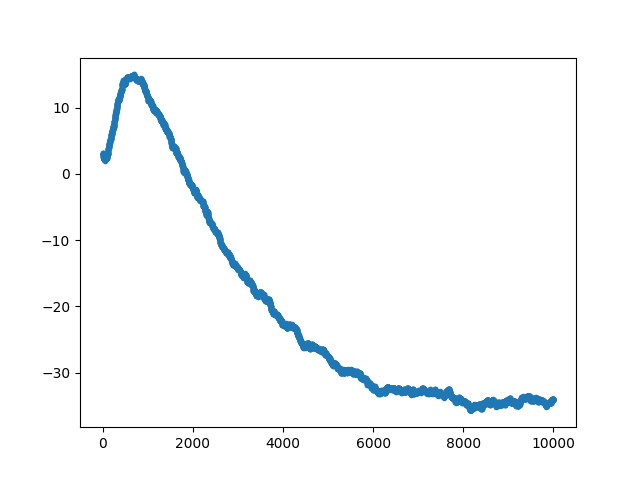

In [182]:
%matplotlib notebook
plt.plot(x0, map(lambda l:l[1],beta0), '.')

<IPython.core.display.Javascript object>


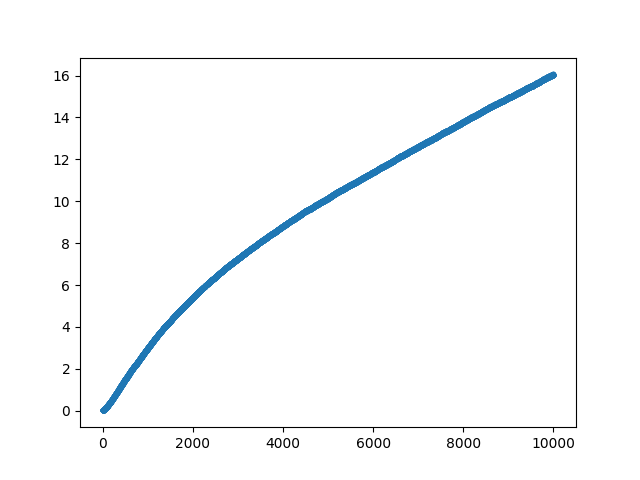

In [183]:
%matplotlib notebook
plt.plot(x0, map(lambda l:l[2],beta0), '.')

<IPython.core.display.Javascript object>


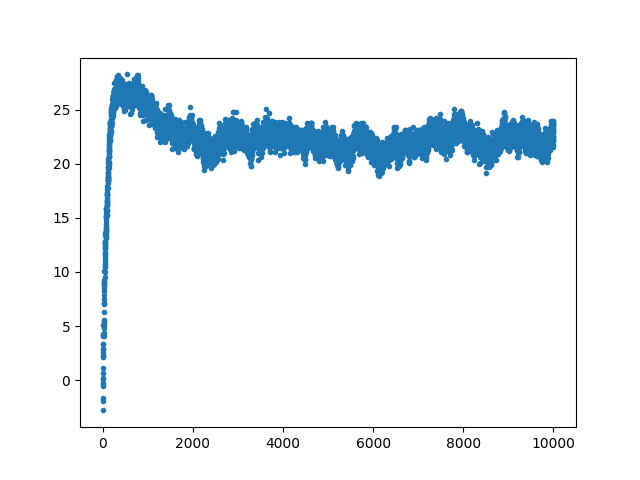

In [184]:
%matplotlib notebook
plt.plot(x0, map(lambda l:l[3],beta0), '.')

<IPython.core.display.Javascript object>


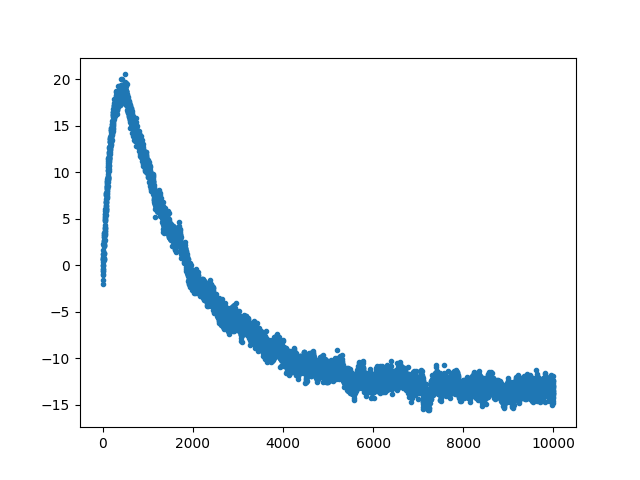

In [185]:
%matplotlib notebook
plt.plot(x0, map(lambda l:l[4],beta0), '.')

<IPython.core.display.Javascript object>


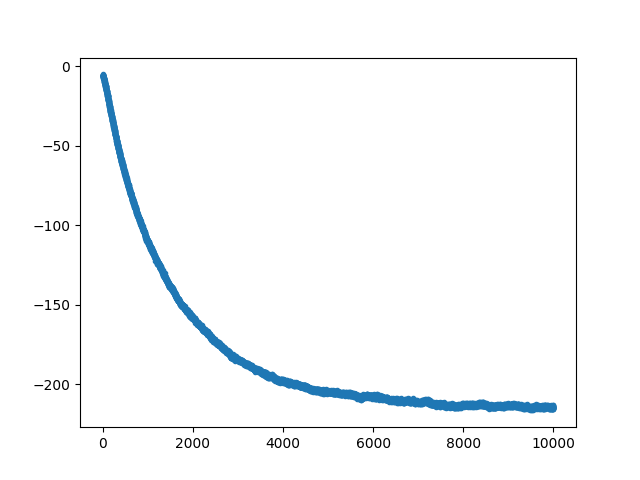

In [205]:
%matplotlib notebook
plt.plot(x0, map(lambda l:l[5],beta0), '.')

<IPython.core.display.Javascript object>


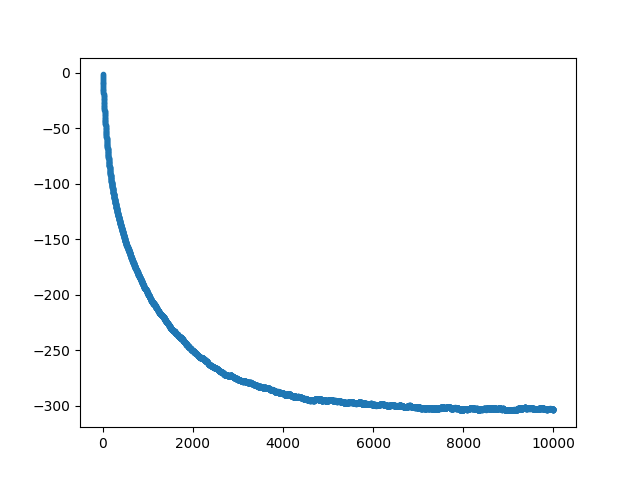

In [206]:
%matplotlib notebook
plt.plot(x0, map(lambda l:l[6],beta0), '.')

<IPython.core.display.Javascript object>


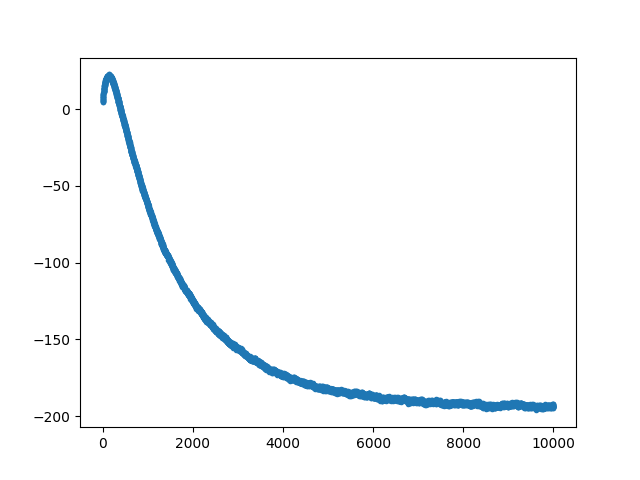

In [207]:
%matplotlib notebook
plt.plot(x0, map(lambda l:l[7],beta0), '.')